# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Assyifa Rahma Habibah
- **Email:** assyifarahmahabibah@gmail.com
- **ID Dicoding:** assyifarahmahabibah

## Menentukan Pertanyaan Bisnis

- Bagaimana analisi petumbuhan pengguna berdasarkan bulan setiap tahunnya?
- Bagaimana pengaruh musim terhadap volume pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [50]:
day_df = pd.read_csv ("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [51]:
hour_df = pd.read_csv ("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan terdiri atas datasets day.csv dan hour.csv
- Data mencangkup waktu, cuaca dan jumlah sewa

### Assessing Data

In [52]:
# Dataset Day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [53]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
print ("Jumlah duplikat: ", day_df.duplicated().sum())

Jumlah duplikat:  0


In [55]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [56]:
# Dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
print("Jumlah duplikat: ", hour_df.duplicated().sum())

Jumlah duplikat:  0


In [59]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value, duplikat dan inaccurate value pada kedua dataset
- Kolom dteday memiliki tipe data yang salah
- Format season, year, hour, holiday, weekdays memiliki format yang masih sulit dipahami

### Cleaning Data

In [60]:
# Mengganti nama kolom agar mudah dipahami
day_df.rename(columns={
    'instant':'id', 
    'dteday':'date', 
    'yr':'year', 
    'mnth':'month', 
    'weathersit':'weather', 
    'cnt':'count'}, 
    inplace=True)
day_df.head()

,id,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [61]:
# #Menghapus kolom yang tidak diperlukan untuk analisis
day_df_drop =['temp','hum','windspeed']
day_df.drop (day_df_drop, axis=1, inplace=True)
day_df.head()

,id,date,season,year,month,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.363625,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.353739,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.189405,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.212122,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.229270,82,1518,1600


In [62]:
# Mengganti tipe data 
day_df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']] = day_df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']].apply(lambda x: x.astype('category'))
day_df['date'] = day_df['date'].astype('datetime64[ns]')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   atemp       731 non-null    float64       
 10  casual      731 non-null    int64         
 11  registered  731 non-null    int64         
 12  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(1), int64(4)
memory usage: 40.8 KB


In [63]:
# Mengubah isi kolom
replacements = {
    'season': {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'},
    'year': {0: 2011, 1: 2012},
    'month' : {1: 'januari', 2: 'februari', 3: 'maret', 4: 'april', 5: 'mei', 6: 'juni', 7: 'juli', 8: 'agustus', 9: 'september', 10: 'oktober', 11: 'november', 12: 'desember'},
    'holiday': {0: 'not holiday', 1: 'holiday'},
    'weekday': {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'},
    'workingday': {0: 'restday', 1: 'workday'},
    'weather': {1: 'clear & partly cloudy', 2: 'mist & cloudy', 3: 'light snow & light rain', 4: 'heavy rain & ice pellets'}
}

for col, mapping in replacements.items():
    day_df[col] = day_df[col].map(mapping)

day_df.head()

,id,date,season,year,month,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,springer,2011,januari,not holiday,saturday,restday,mist & cloudy,0.363625,331,654,985
1,2,2011-01-02,springer,2011,januari,not holiday,sunday,restday,mist & cloudy,0.353739,131,670,801
2,3,2011-01-03,springer,2011,januari,not holiday,monday,workday,clear & partly cloudy,0.189405,120,1229,1349
3,4,2011-01-04,springer,2011,januari,not holiday,tuesday,workday,clear & partly cloudy,0.212122,108,1454,1562
4,5,2011-01-05,springer,2011,januari,not holiday,wednesday,workday,clear & partly cloudy,0.229270,82,1518,1600


In [64]:
# Dataset hour_df
# Mengganti nama kolom agar mudah dipahami
hour_df.rename(columns={
    'instant':'id', 
    'dteday':'date', 
    'yr':'year', 
    'mnth':'month', 
    'hr':'hour',
    'weathersit':'weather', 
    'cnt':'count'}, 
    inplace=True)
hour_df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [65]:
# Mengapus kolom yang tidak diperlukan untuk analisis
hour_df_drop =['temp', 'hum', 'windspeed']
hour_df.drop (hour_df_drop, axis=1, inplace=True)
hour_df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2879,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2727,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2727,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2879,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2879,0,1,1


In [66]:
# Mengganti tipe data 
hour_df[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']] = hour_df[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']].apply(lambda x: x.astype('category'))
hour_df['date'] = hour_df['date'].astype('datetime64[ns]')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  atemp       17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  count       17379 non-null  int64         
dtypes: category(8), datetime64[ns](1), float64(1), int64(4)
memory usage: 952.8 KB


In [67]:
# Mengubah isi kolom 
replacements = {
    'season': {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'},
    'year': {0: 2011, 1: 2012},
    'month' : {1: 'januari', 2: 'februari', 3: 'maret', 4: 'april', 5: 'mei', 6: 'juni', 7: 'juli', 8: 'agustus', 9: 'september', 10: 'oktober', 11: 'november', 12: 'desember'},
    'holiday': {0: 'not holiday', 1: 'holiday'},
    'weekday': {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'},
    'workingday': {0: 'restday', 1: 'workday'},
    'weather': {1: 'clear & partly cloudy', 2: 'mist & cloudy', 3: 'light snow & light rain', 4: 'heavy rain & ice pellets'},
    'hour': { 0: '12 am', 1: '1 am', 2: '2 am', 3: '3 am', 4: '4 am', 5: '5 am', 6: '6 am', 7: '7 am', 8: '8 am', 9: '9 am', 10: '10 am', 11: '11 am', 
             12: '12 pm', 13: '1 pm', 14: '2 pm', 15: '3 pm', 16: '4 pm', 17: '5 pm', 18: '6 pm', 19: '7 pm', 20: '8 pm', 21: '9 pm', 22: '10 pm', 23: '11 pm'
    }
}

for col, mapping in replacements.items():
    if col in hour_df.columns: 
        hour_df[col] = hour_df[col].map(mapping)

hour_df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,springer,2011,januari,12 am,not holiday,saturday,restday,clear & partly cloudy,0.2879,3,13,16
1,2,2011-01-01,springer,2011,januari,1 am,not holiday,saturday,restday,clear & partly cloudy,0.2727,8,32,40
2,3,2011-01-01,springer,2011,januari,2 am,not holiday,saturday,restday,clear & partly cloudy,0.2727,5,27,32
3,4,2011-01-01,springer,2011,januari,3 am,not holiday,saturday,restday,clear & partly cloudy,0.2879,3,10,13
4,5,2011-01-01,springer,2011,januari,4 am,not holiday,saturday,restday,clear & partly cloudy,0.2879,0,1,1


**Insight:**
- Nama kolom sudah lebih mudah dibaca dan dipahami
- Kolom sudah berisi data yang lebih mudah dipahami
- Tipe data sudah diubah sesuai semestinya

## Exploratory Data Analysis (EDA)

### Explore 

In [68]:
day_df.describe(include="all")

,id,date,season,year,month,holiday,weekday,workingday,weather,atemp,casual,registered,count
count,731.000000,731,731,731.0,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2,7,2,3,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,januari,not holiday,sunday,workday,clear & partly cloudy,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710,105,500,463,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474354,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079070,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337842,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.486733,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608602,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.840896,3410.000000,6946.000000,8714.000000


In [69]:
# Mengelompokkan berdasarkan season
day_df.groupby(by='season', observed=True).registered.nunique().sort_values(ascending=False)

season
fall        181
summer      180
springer    177
winter      177
Name: registered, dtype: int64

In [70]:
# Mengelompkkan berdasarkan hari untuk mengetahui jumlah total perharinya
day_df.groupby(by='weekday', observed=True).agg({
    "count":"sum"
}).sort_values(by="count", ascending=False)

,count
weekday,
friday,487790
thursday,485395
saturday,477807
wednesday,473048
tuesday,469109
monday,455503
sunday,444027


In [71]:
# Mengelompokkan berdasarkan kategori workingday
day_df.groupby(by='workingday', observed=True).registered.nunique().sort_values(ascending=False)

workingday
workday    476
restday    223
Name: registered, dtype: int64

In [81]:
# Berdasarkan tahun mengetahui jumlah pelanggan 
day_df.groupby('year', observed=True).agg({
    "count" : "sum"
}).reset_index().sort_values(by="count", ascending=False)

,year,count
1,2012,2049576
0,2011,1243103


In [ ]:
# Mengelompokkan berdasarkan tahun persebaran pelanggan langganan(terdaftar) dan tidak
day_df.groupby(by='year').agg({
    "casual":"sum",
    "registered":"sum"
}).reset_index().head()

C:\Users\zc\AppData\Local\Temp\ipykernel_14960\69858811.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='year').agg({


,year,casual,registered
0,2011,247252,995851
1,2012,372765,1676811


In [82]:
# mengidentifikasi hari dengan jumlah pelanggan terbanyak
day_df.groupby(by="date").agg({
    "count":"sum"
}).reset_index().head().sort_values(by="count", ascending=False)

,date,count
4,2011-01-05,1600
3,2011-01-04,1562
2,2011-01-03,1349
0,2011-01-01,985
1,2011-01-02,801


In [73]:
# Mengetahui musim apa dengan jumlah pelangga terbanyak
day_df.groupby('season', observed=True).agg({
    "count":"sum"
}).reset_index().sort_values(by="count", ascending=False)

,season,count
2,fall,1061129
1,summer,918589
3,winter,841613
0,springer,471348


In [78]:
# mengidentifikasi jumah pengguna max min berdasarkan holiday
day_df.groupby(by= "holiday").agg({
    "count" : ["max", "min"],
}).reset_index()

C:\Users\zc\AppData\Local\Temp\ipykernel_14960\3009633979.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by= "holiday").agg({


holiday count      
                 max   min
0  not holiday  8714    22
1      holiday  7403  1000

In [ ]:
# mengidentifikasi pengaruh musim pada tiap tahun berbeda terhadap jumlah pelanggan
day_df.groupby(by=["weather", "year"], observed=True).agg({
    "count" : "mean"
})

count
weather                 year             
clear & partly cloudy   2011  3694.986726
                        2012  6003.734177
mist & cloudy           2011  3088.096774
                        2012  4991.333333
light snow & light rain 2011  1674.133333
                        2012  2126.166667

In [ ]:
#Mengetahui jumlah pelanggan berdasarkan bulan dan tahun
day_df.groupby(by=['year','month'], observed=False).agg({
    'count': 'sum'
}).sort_values(by='count', ascending=False)

count
year month            
2012 september  218573
     agustus    214503
     juli       203607
     juni       202830
     oktober    198841
     mei        195865
     april      174224
     maret      164875
     november   152664
2011 juni       143512
     juli       141341
     agustus    136691
     mei        135821
     september  127418
2012 desember   123713
2011 oktober    123511
2012 februari   103137
2011 november   102167
2012 januari     96744
2011 april       94870
     desember    87323
     maret       64045
     februari    48215
     januari     38189

In [85]:
hour_df.describe(include="all")

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,atemp,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,24,2,7,2,4,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,juli,4 pm,not holiday,saturday,workday,clear & partly cloudy,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,730,16879,2512,11865,11413,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475775,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484800,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621200,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,367.000000,886.000000,977.000000


In [92]:
# Pola penyewaan berdasarkan jam
hour_df.groupby(by="hour").agg({
    "count":"sum"
}).reset_index().sort_values(by='count', ascending=False).head(10)

C:\Users\zc\AppData\Local\Temp\ipykernel_14960\2334350627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="hour").agg({


,hour,count
17,5 pm,336860
18,6 pm,309772
8,8 am,261001
16,4 pm,227748
19,7 pm,226789
13,1 pm,184919
12,12 pm,184414
15,3 pm,183149
14,2 pm,175652
20,8 pm,164550


In [ ]:
# Mengetahui dijam dan tangal berapa penyewaan terbanyak
hour_df.groupby(by=["date", "hour"]).agg({
    "count":"sum"
}).reset_index().sort_values(by='count', ascending=False).head(10)

C:\Users\zc\AppData\Local\Temp\ipykernel_14960\423827773.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["date", "hour"]).agg({


,date,hour,count
14898,2012-09-12,6 pm,977
15089,2012-09-20,5 pm,976
14873,2012-09-11,5 pm,970
14850,2012-09-10,6 pm,968
15209,2012-09-25,5 pm,967
15905,2012-10-24,5 pm,963
10745,2012-03-23,5 pm,957
15233,2012-09-26,5 pm,953
15569,2012-10-10,5 pm,948
15713,2012-10-16,5 pm,943


In [97]:
# menemukan pola berdasarkan jam pada hari kerja
hour_df.groupby(["workingday", "hour"]).agg({
    "count" : "sum"
}).reset_index().sort_values(by='count', ascending=False).head(10)

C:\Users\zc\AppData\Local\Temp\ipykernel_14960\1542694822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["workingday", "hour"]).agg({


,workingday,hour,count
41,workday,5 pm,262120
42,workday,6 pm,245129
32,workday,8 am,236595
43,workday,7 pm,173504
40,workday,4 pm,146268
31,workday,7 am,144144
44,workday,8 pm,124360
33,workday,9 am,119793
39,workday,3 pm,100263
36,workday,12 pm,99808


In [96]:
# mengetahui hubungan cuaca dengan jumlah pengguna
hour_df.groupby(by="atemp", observed=True).agg({
    "count" : "sum",
}).reset_index().sort_values(by="count", ascending=False)

,atemp,count
41,0.6212,311459
43,0.6515,162997
44,0.6667,155734
40,0.6061,129150
46,0.6970,127608
...,...,...
62,0.9545,115
2,0.0303,111
64,1.0000,101
0,0.0000,39


**Insight:**
#### 1. Hari dengan Jumlah Pelanggan Terbanyak:
Secara keseluruhan, hari Jumat mencatat jumlah pelanggan tertinggi, yaitu sebanyak 487.790 pelanggan. Hal ini mungkin disebabkan oleh aktivitas akhir pekan yang dimulai pada Jumat sore, sehingga banyak orang memilih untuk bersepeda sebagai persiapan atau bagian dari rutinitas akhir pekan.

#### 2. Perbandingan Pelanggan pada Hari Kerja vs. Hari Libur:
Pelanggan lebih banyak menggunakan layanan pada hari kerja (workday) dibandingkan hari libur (restday), dengan selisih sekitar 36%. Hal ini dapat disebabkan oleh penggunaan sepeda sebagai alat transportasi utama untuk bekerja atau beraktivitas sehari-hari. Di sisi lain, pada hari libur, orang mungkin lebih memilih untuk beristirahat atau melakukan aktivitas lain.

#### 3. Peningkatan Jumlah Pelanggan dari Tahun 2011 hingga 2012:
Jumlah pelanggan mengalami peningkatan signifikan sebesar 24,5% dari tahun 2011 hingga 2012. Peningkatan ini mungkin didukung oleh promosi yang lebih gencar, peningkatan kualitas layanan, atau bertambahnya kesadaran masyarakat akan manfaat bersepeda.

#### 4. Dominasi Pelanggan Tetap (Registered Users):
Sebagian besar pelanggan merupakan pelanggan tetap (registered users). Pada tahun 2012, terdapat 1.676.811 pelanggan tetap, sementara pada tahun 2011 jumlahnya adalah 995.851 pelanggan tetap. Hal ini menunjukkan bahwa layanan ini memiliki basis pelanggan yang loyal dan terus berkembang.

#### 5. Tanggal dengan Jumlah Pelanggan Tertinggi:
Tanggal 5 Januari 2011 mencatat jumlah pelanggan tertinggi dalam satu hari, yaitu sebanyak 1.600 pelanggan. Kemungkinan besar hal ini dipengaruhi oleh cuaca yang mendukung atau adanya event khusus yang menarik minat masyarakat untuk bersepeda.

#### 6. Musim dengan Jumlah Pelanggan Tertinggi:
Musim fall (musim gugur) mencatat jumlah pelanggan tertinggi, yaitu sebanyak 1.061.129 pelanggan. Cuaca yang sejuk dan nyaman selama musim gugur mungkin menjadi faktor utama yang mendorong masyarakat untuk lebih aktif bersepeda.

#### 7. Perbandingan Pelanggan pada Hari Biasa vs. Hari Libur Nasional (Holiday):
Pada hari biasa (bukan holiday), jumlah pelanggan tertinggi mencapai 8.714 pelanggan, sedangkan terendah adalah 22 pelanggan. Sementara itu, pada hari libur nasional (holiday), jumlah pelanggan tertinggi adalah 7.403 pelanggan, dan terendah adalah 1.000 pelanggan. Hal ini menunjukkan bahwa aktivitas bersepeda cenderung lebih tinggi pada hari biasa, kemungkinan karena penggunaan sepeda untuk keperluan transportasi sehari-hari.

#### 8. Pengaruh Cuaca terhadap Jumlah Pelanggan:
Pada tahun 2012, jumlah pelanggan tertinggi terjadi pada musim clear & partly cloudy (cerah dan berawan sebagian), sementara pada tahun 2011, jumlah pelanggan terendah terjadi pada musim light snow & light rain (salju ringan dan hujan ringan). Cuaca yang cerah dan tidak ekstrem cenderung mendorong masyarakat untuk bersepeda.

#### 9. Bulan dengan Jumlah Pelanggan Tertinggi:
Bulan September 2012 mencatat jumlah pelanggan tertinggi, yaitu sebanyak 218.573 pelanggan. Hal ini mungkin dipengaruhi oleh cuaca yang ideal pada musim gugur, serta adanya event atau promosi khusus yang diadakan pada bulan tersebut.

#### 10. Waktu dengan Jumlah Pelanggan Tertinggi:
Secara keseluruhan, pukul 17.00 (5 PM) merupakan waktu dengan jumlah pelanggan tertinggi, yaitu sebanyak 336.860 pelanggan. Hal ini kemungkinan besar disebabkan oleh aktivitas pulang kerja atau sekolah, di mana banyak orang memilih bersepeda sebagai alternatif transportasi.

#### 11. Tanggal dan Jam dengan Jumlah Pelanggan Tertinggi:
Tanggal 12 September 2012 pada pukul 18.00 (6 PM) mencatat jumlah pelanggan tertinggi berdasarkan kombinasi tanggal dan jam. Hal ini mungkin dipengaruhi oleh cuaca yang mendukung serta adanya event atau aktivitas khusus pada waktu tersebut.

#### 12. Perbandingan Pelanggan pada Hari Kerja Berdasarkan Jam:
Pada hari kerja (workday), jumlah pelanggan tertinggi terjadi pada pukul 17.00 (5 PM), yang konsisten dengan tren penggunaan sepeda sebagai alat transportasi pulang kerja.

#### 13. Pengaruh Suhu terhadap Jumlah Pelanggan:
Suhu yang dirasakan memiliki pengaruh signifikan terhadap jumlah pelanggan. Suhu yang nyaman (tidak terlalu panas atau dingin) cenderung meningkatkan minat masyarakat untuk bersepeda. Hal ini menunjukkan bahwa faktor cuaca memainkan peran penting dalam menentukan tingkat penggunaan layanan bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana analisis petumbuhan pengguna berdasarkan bulan setiap tahunnya?


C:\Users\zc\AppData\Local\Temp\ipykernel_14960\4244929585.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_growth = day_df.groupby(['year', 'month'])['count'].sum().reset_index()


   year     month   count
0  2011   januari   38189
1  2011  februari   48215
2  2011     maret   64045
3  2011     april   94870
4  2011       mei  135821


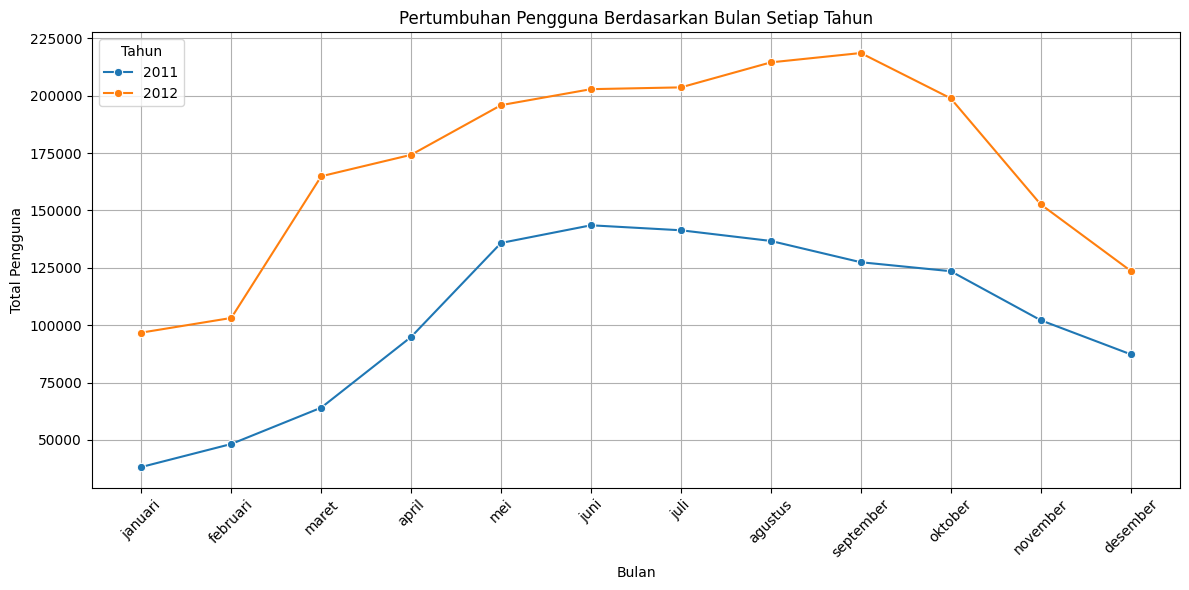

In [98]:
# Group by tahun dan bulan dan menghiyung jumlah pelanggan
monthly_growth = day_df.groupby(['year', 'month'])['count'].sum().reset_index()


month_order = [
    'januari', 'februari', 'maret', 'april', 'mei', 'juni', 
    'juli', 'agustus', 'september', 'oktober', 'november', 'desember'
]

monthly_growth['month'] = pd.Categorical(monthly_growth['month'], categories=month_order, ordered=True)
monthly_growth = monthly_growth.sort_values(['year', 'month'])
print(monthly_growth.head())

# Visualisasi pertumbuhan pengguna
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_growth, x='month', y='count', hue='year', marker='o')
plt.title ('Pertumbuhan Pengguna Berdasarkan Bulan Setiap Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Pengguna')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Tahun', loc='upper left')  # Posisikan legend agar tidak menutupi grafik
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh musim terhadap volume pengguna sepeda?

C:\Users\zc\AppData\Local\Temp\ipykernel_14960\1247214139.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_total = day_df.groupby('season', as_index=False)['count'].sum()
C:\Users\zc\AppData\Local\Temp\ipykernel_14960\1247214139.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=season_total, x='season', y='count', order=season_total["season"], palette=colors)


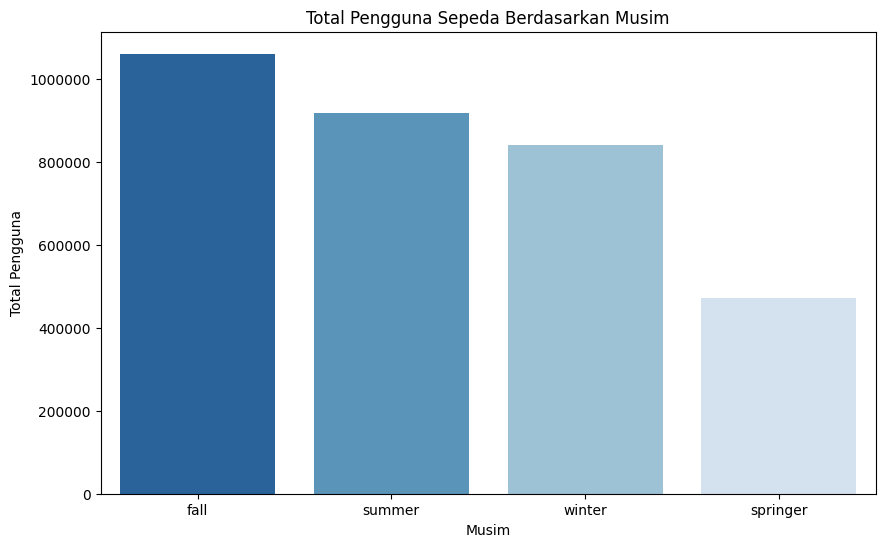

In [119]:
# Mengelompokkan data berdasarkan musim dan menghitung total pengguna
season_total = day_df.groupby('season', as_index=False)['count'].sum()

# Mengurutkan berdasarkan total pengguna dari tertinggi ke terendah
season_total = season_total.sort_values(by='count', ascending=False)

season_total['season'] = pd.Categorical(season_total['season'], categories=season_total['season'], ordered=True)

# Visualisai
plt.figure(figsize=(10, 6))
norm = plt.Normalize(season_total['count'].min(), season_total['count'].max())
colors = sns.color_palette("Blues_r", len(season_total))  
ax = sns.barplot(data=season_total, x='season', y='count', order=season_total["season"], palette=colors)
plt.ticklabel_format(style='plain', axis='y')  
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  
plt.title('Total Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Pengguna')
plt.show()



**Insight:**
- Jumlah pengguna pada 2012 selalu lebih tinggi dibanding 2011. Kedua tahun memiliki pola serupa: peningkatan hingga pertengahan tahun, lalu penurunan menjelang akhir tahun. Lonjakan pengguna pada 2012 lebih tajam, dengan puncaknya di September. Penurunan di akhir tahun bisa disebabkan oleh faktor musiman atau kebiasaan pengguna.
- Musim memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda.Penggunaan sepeda paling tinggi pada musim panas dan paling rendah pada musim dingin. Musim semi dan musim gugur memiliki penggunaan sepeda yang sedang, dengan musim gugur cenderung lebih tinggi daripada musim semi.

## Analisis Lanjutan

#### Tujuan Analisis
Tujuan analisis ini adalah untuk memahami hubungan antara suhu yang dirasakan (`atemp`) dan jumlah pengguna sepeda, serta mengidentifikasi pola penggunaan sepeda berdasarkan kategori suhu (Dingin, Sedang, Panas). Dengan mengetahui preferensi pengguna terhadap kondisi suhu tertentu, analisis ini bertujuan untuk memberikan rekomendasi bisnis yang dapat meningkatkan layanan, seperti meningkatkan ketersediaan sepeda pada suhu yang nyaman atau menawarkan promosi pada suhu yang kurang diminati.

#### Metodologi
Analisis dilakukan dengan menggunakan teknik binning (pengelompokan manual) berdasarkan nilai atemp (suhu yang dirasakan). Data dikelompokkan ke dalam tiga kategori suhu:
- Dingin: atemp < 0.3
- Sedang: 0.3 <= atemp < 0.6
- Panas: atemp >= 0.6

C:\Users\zc\AppData\Local\Temp\ipykernel_14960\3631632120.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=atemp_category_total, x='kategori_atemp', y='count',


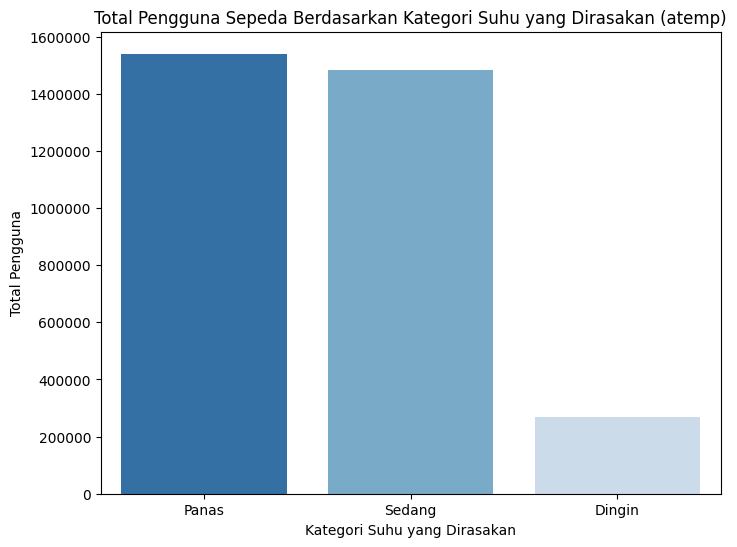

In [121]:
# Fungsi untuk mengkategorikan atemp
def kategori_atemp(atemp):
    if atemp < 0.3:
        return 'Dingin'
    elif 0.3 <= atemp < 0.6:
        return 'Sedang'
    else:
        return 'Panas'

# Membuat kolom baru 'kategori_atemp'
hour_df['kategori_atemp'] = hour_df['atemp'].apply(kategori_atemp)

# Menghitung total pengguna berdasarkan kategori atemp
atemp_category_total = hour_df.groupby('kategori_atemp')['count'].sum().reset_index()

# Mengurutkan kategori berdasarkan jumlah pengguna dari tertinggi ke terendah
atemp_category_total = atemp_category_total.sort_values(by='count', ascending=False)

# Visualisasi 
plt.figure(figsize=(8, 6))
sns.barplot(data=atemp_category_total, x='kategori_atemp', y='count', 
            order=atemp_category_total["kategori_atemp"], 
            palette=sns.color_palette("Blues_r", len(atemp_category_total)))
plt.title('Total Pengguna Sepeda Berdasarkan Kategori Suhu yang Dirasakan (atemp)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  
plt.xlabel('Kategori Suhu yang Dirasakan')
plt.ylabel('Total Pengguna')
plt.show()


#### Insight:
#### 1. Pengguna Sepeda Lebih Banyak Saat Cuaca Panas dan Sedang
Mayoritas pengguna sepeda berada dalam kategori Panas dan Sedang, yang berarti bahwa kondisi suhu yang lebih tinggi mendorong lebih banyak orang untuk menggunakan sepeda.
Hal ini bisa disebabkan oleh kenyamanan bersepeda saat cuaca cerah atau lebih hangat, di mana jalanan lebih kering dan lebih aman dibandingkan cuaca dingin.
Penggunaan Sepeda Berkurang Drastis Saat Cuaca Dingin

#### 2. Saat suhu terasa dingin, jumlah pengguna turun signifikan.
Faktor seperti ketidaknyamanan, risiko jalanan licin, atau preferensi transportasi alternatif saat cuaca dingin mungkin menjadi penyebab utama.
Bisnis yang bergantung pada penyewaan atau penjualan sepeda perlu mencari strategi untuk meningkatkan penggunaan di musim dingin.
Peluang Bisnis & Strategi

#### 3. Peningkatan Kenyamanan Saat Cuaca Dingin: 
- Menawarkan layanan seperti peminjaman jaket, rute khusus dengan perlindungan dari angin, atau bahkan pemanas genggam bagi pengguna.
- Promo Musiman: Memberikan diskon atau insentif untuk menarik lebih banyak pengguna saat suhu dingin.

## Conclusion

#### Conclution pertanyaan 1 
Pengguna sepeda menunjukkan peningkatan dari awal tahun hingga pertengahan tahun, dengan puncaknya terjadi pada bulan-bulan musim panas seperti Juni, Juli, dan Agustus, sebelum kemudian menurun menjelang akhir tahun. Pertumbuhan penggunaan sepeda pada tahun 2012 lebih signifikan dibandingkan tahun 2011, terutama selama bulan-bulan musim panas. Penurunan penggunaan di akhir tahun kemungkinan besar dipengaruhi oleh cuaca yang lebih dingin serta adanya hari libur, yang mengurangi minat orang untuk menggunakan sepeda. Dengan memahami tren ini, perusahaan dapat merencanakan strategi yang lebih efektif, seperti meningkatkan ketersediaan sepeda selama periode permintaan tinggi dan menawarkan promosi pada periode penurunan untuk mempertahankan minat pengguna.

#### Conclution pertanyaan 2
Musim memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda. Penggunaan sepeda mencapai puncaknya pada musim panas karena cuaca yang hangat dan cerah mendorong aktivitas luar ruangan. Sebaliknya, penggunaan sepeda paling rendah pada musim dingin akibat cuaca yang dingin dan ekstrem. Sementara itu, musim semi dan musim gugur menunjukkan penggunaan sepeda yang sedang, dengan musim gugur cenderung lebih tinggi daripada musim semi karena cuaca yang masih nyaman dan pemandangan yang menarik. Dengan memahami pola ini, perusahaan dapat mengoptimalkan ketersediaan sepeda dan menyesuaikan strategi bisnis sesuai dengan musim, seperti meningkatkan stok sepeda pada musim panas dan menawarkan promosi pada musim dingin untuk menarik lebih banyak pengguna.